In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('../data/lichess_db_puzzle.csv')

In [3]:
df.head()

,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags
0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1917,76,94,6044,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#47,NaN
1,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1485,74,96,25966,advantage endgame short,https://lichess.org/F8M8OS71#52,NaN
2,0008Q,8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64,e7f7 f5e5 e2f1 e5e6,1420,74,90,541,advantage endgame rookEndgame short,https://lichess.org/MQSyb3KW#126,NaN
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1123,74,87,567,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#31,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Vari...
4,000Vc,8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53,g4h5 g6h5 f4f5 e6e5 f5f6 e5f6,1556,81,73,91,crushing endgame long pawnEndgame,https://lichess.org/l6AejDMO#104,NaN


In [4]:
lim=500000

In [5]:
df_train=df


In [6]:
# Calculate the average and thresholds
avg_popularity = df_train['Popularity'].mean()
avg_nb_plays = df_train['NbPlays'].mean()
avg_rating_deviation = df_train['RatingDeviation'].mean()

# Filter the DataFrame
filtered_df = df_train[(df_train['Popularity'] > 0.75 * avg_popularity) & 
                       (df_train['NbPlays'] > 0.75 * avg_nb_plays) ]

# Limit the number of rows
limit = 10000
df_train = filtered_df.head(limit)

In [7]:
df_train

,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags
0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1917,76,94,6044,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#47,NaN
1,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1485,74,96,25966,advantage endgame short,https://lichess.org/F8M8OS71#52,NaN
13,00143,r2q1rk1/5ppp/1np5/p1b5/2p1B3/P7/1P3PPP/R1BQ1RK...,d8f6 d1h5 h7h6 h5c5,1785,75,91,2422,advantage middlegame short,https://lichess.org/jcuxlI63/black#33,Scotch_Game Scotch_Game_Mieses_Variation
14,0018S,2kr3r/pp3p2/4p2p/1N1p2p1/3Q4/1P1P4/2q2PPP/5RK1...,b7b6 d4a1 a7a5 f1c1,2623,116,90,1627,advantage endgame pin short,https://lichess.org/H1ARO2GL/black#39,NaN
26,001wr,r4rk1/p3ppbp/Pp1q1np1/3PpbB1/2B5/2N5/1PPQ1PPP/...,f2f3 d6c5 g1h1 c5c4,994,76,96,1785,advantage fork master masterVsMaster middlegam...,https://lichess.org/KnJ2mojX#34,Pirc_Defense Pirc_Defense_Classical_Variation
...,...,...,...,...,...,...,...,...,...,...
38386,0cEUo,1kr5/p6p/8/1q1pp3/4r3/2PR2P1/R4QKP/8 b - - 1 41,b5d3 f2a7,965,79,92,2160,endgame mate mateIn1 oneMove,https://lichess.org/3F5lsm8y/black#81,NaN
38390,0cErC,2k5/pp5p/3p4/2pQ4/3bPrq1/3P2P1/PPP3PK/R7 w - -...,g3f4 g4h4,1061,76,92,1796,endgame master mate mateIn1 oneMove,https://lichess.org/bQHpcavF#46,NaN
38395,0cF7T,4rr1k/1p4p1/p2p2q1/6bp/P2BB1b1/2Pn2P1/1P2QPNP/...,e8e4 e2e4 g6e4 e1e4,1681,76,93,3450,advantage master middlegame short,https://lichess.org/Be99LLb7/black#61,NaN
38397,0cFFo,8/1pp2qk1/p1np3p/4p1p1/1P2Q3/2PP2N1/P5PP/6K1 b...,f7f4 g3h5 g7f8 h5f4,1206,74,91,1533,crushing endgame fork short,https://lichess.org/M57vMmvz/black#51,NaN


In [8]:
df_train.to_csv('../data/data_dummy.csv', index=False)

In [362]:
targets=df_train.iloc[:lim,:]['Rating']
df_train=df_train.iloc[:lim,:][['PuzzleId','FEN','Moves']]


In [363]:
df_train

,PuzzleId,FEN,Moves
0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1
1,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8
13,00143,r2q1rk1/5ppp/1np5/p1b5/2p1B3/P7/1P3PPP/R1BQ1RK...,d8f6 d1h5 h7h6 h5c5
14,0018S,2kr3r/pp3p2/4p2p/1N1p2p1/3Q4/1P1P4/2q2PPP/5RK1...,b7b6 d4a1 a7a5 f1c1
26,001wr,r4rk1/p3ppbp/Pp1q1np1/3PpbB1/2B5/2N5/1PPQ1PPP/...,f2f3 d6c5 g1h1 c5c4
...,...,...,...
38386,0cEUo,1kr5/p6p/8/1q1pp3/4r3/2PR2P1/R4QKP/8 b - - 1 41,b5d3 f2a7
38390,0cErC,2k5/pp5p/3p4/2pQ4/3bPrq1/3P2P1/PPP3PK/R7 w - -...,g3f4 g4h4
38395,0cF7T,4rr1k/1p4p1/p2p2q1/6bp/P2BB1b1/2Pn2P1/1P2QPNP/...,e8e4 e2e4 g6e4 e1e4
38397,0cFFo,8/1pp2qk1/p1np3p/4p1p1/1P2Q3/2PP2N1/P5PP/6K1 b...,f7f4 g3h5 g7f8 h5f4


# Speed up

In [364]:
def extract_moved_pieces(fen, moves):
    board = chess.Board(fen)
    moved_pieces = set()
    
    # Split the moves into a list
    moves_list = moves.split()
    
    # Apply each move to the board
    for move in moves_list:
        move_obj = board.parse_san(move)
        from_square = move_obj.from_square
        piece = board.piece_at(from_square)
        if piece:
            # Add the piece type and its color to the set
            moved_pieces.add(piece.symbol())
        board.push(move_obj)
    
    # Count the number of unique pieces moved
    num_moved_pieces = len(moved_pieces)
    
    return num_moved_pieces, list(moved_pieces)

In [365]:
import chess
import chess.syzygy
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer


def extract_features(fen):
    board = chess.Board(fen)
    features = {}

    # Piece values
    piece_values = {chess.PAWN: 1, chess.KNIGHT: 3, chess.BISHOP: 3, chess.ROOK: 5, chess.QUEEN: 9, chess.KING: 0}

    
    # Material imbalance
    if board.turn == chess.WHITE:
        features['my_material'] = sum(len(board.pieces(piece, chess.WHITE)) * piece_values[piece] for piece in chess.PIECE_TYPES)
        features['his_material'] = sum(len(board.pieces(piece, chess.BLACK)) * piece_values[piece] for piece in chess.PIECE_TYPES)
        features['material_imbalance'] = features['my_material'] - features['his_material']
    else:
        features['my_material'] = sum(len(board.pieces(piece, chess.BLACK)) * piece_values[piece] for piece in chess.PIECE_TYPES)
        features['his_material'] = sum(len(board.pieces(piece, chess.WHITE)) * piece_values[piece] for piece in chess.PIECE_TYPES) 
        features['material_imbalance'] = features['my_material'] - features['his_material']
        
    
    # features['is_attacked_by_opponent'] = board.is_attacked_by(not board.turn, chess.E8)
    # features['num_attackers'] = len(board.attackers(not board.turn, chess.E8))

    
    
    
    features['halfmove_clock'] = board.halfmove_clock
    
    

    

    return pd.Series(features)

def extract_features_from_moves(moves):
    # Split the moves string into a list of moves
    moves_list = moves.split(" ")

    # The number of moves is the length of the list
    num_moves = len(moves_list)

    return num_moves
def extract_moved_pieces(fen, moves):
    board = chess.Board(fen)
    moved_pieces = set()
    
    # Split the moves into a list
    moves_list = moves.split()
    
    # Get the color of the player who moves first
    first_move_color = board.turn
    
    # Apply each move to the board
    for move in moves_list:
        move_obj = board.parse_san(move)
        from_square = move_obj.from_square
        piece = board.piece_at(from_square)
        if piece and piece.color == first_move_color:
            # Add the piece type (in lowercase) to the set
            moved_pieces.add(piece.symbol().lower())
        board.push(move_obj)
    
    # Count the number of unique pieces moved
    num_moved_pieces = len(moved_pieces)
    
    return num_moved_pieces, list(moved_pieces)

# Apply the function to the 'Moves' column
df_train['moved_pieces_info'] = df_train.apply(lambda row: extract_moved_pieces(row['FEN'], row['Moves']), axis=1)
df_train[['num_moved_pieces', 'moved_pieces']] = pd.DataFrame(df_train['moved_pieces_info'].tolist(), index= df_train.index)

# Initialize the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the 'moved_pieces' column
one_hot_moved_pieces = mlb.fit_transform(df_train['moved_pieces'])

# Convert the result to a DataFrame and set the column names
one_hot_moved_pieces_df = pd.DataFrame(one_hot_moved_pieces, columns=mlb.classes_, index=df_train.index)

# Now, you can concatenate the results with your existing features
df_t = pd.concat([df_train['FEN'].apply(extract_features), df_train['Moves'].apply(extract_features_from_moves),df_train['num_moved_pieces'],one_hot_moved_pieces_df], axis=1)


In [366]:
# Now each feature is a column in your DataFrame
df_t

,my_material,his_material,material_imbalance,halfmove_clock,Moves,num_moved_pieces,b,k,n,p,q,r
0,27,27,0,0,6,2,1,0,0,0,1,0
1,22,22,0,2,4,1,0,0,0,0,1,0
13,31,30,1,1,4,2,0,0,0,1,1,0
14,26,22,4,1,4,1,0,0,0,1,0,0
26,35,35,0,4,4,2,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
38386,23,22,1,1,2,1,0,0,0,0,1,0
38390,21,22,-1,0,2,1,0,0,0,1,0,0
38395,33,34,-1,0,4,2,0,0,0,0,1,1
38397,19,18,1,2,4,2,0,1,0,0,1,0


In [367]:

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df_t, targets, test_size=0.2, random_state=42)

In [368]:
y_test.shape

(2000,)

In [369]:
# Feature scaling
from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 165527.2173544923


In [370]:
X_test

,my_material,his_material,material_imbalance,halfmove_clock,Moves,num_moved_pieces,b,k,n,p,q,r
24200,28,26,2,0,6,2,0,1,0,1,0,0
18218,35,33,2,1,4,2,0,1,0,0,0,1
6785,32,30,2,5,4,1,0,0,0,0,1,0
18445,27,25,2,0,4,2,0,1,0,0,0,1
17598,33,30,3,6,6,2,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
24919,24,25,-1,0,4,2,0,0,0,0,1,1
31948,24,17,7,0,4,2,0,1,0,0,0,1
30265,25,23,2,0,6,2,0,1,0,0,1,0
4273,35,34,1,1,8,4,1,0,1,1,1,0


In [371]:
from xgboost import XGBRegressor

# Model training
eval_set = [(X_train, y_train), (X_test, y_test)]


xgb_model = XGBRegressor(
    n_estimators=100,
    max_depth=3,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    learning_rate=0.1,
    random_state=42,
)


xgb_model.fit(X_train, y_train, verbose=False)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f'Mean Squared Error (XGBoost): {mse_xgb}')

Mean Squared Error (XGBoost): 141170.9900853278


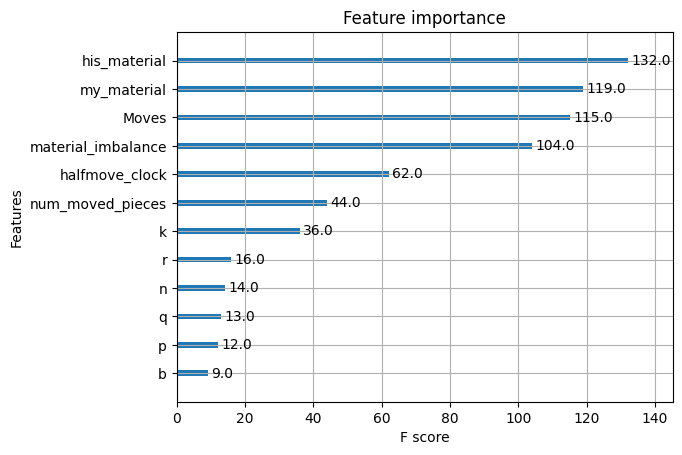

In [372]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Assuming 'model' is your trained XGBoost model
plot_importance(xgb_model)
plt.show()

In [291]:
# plot feture importance
model.feature_importances_

array([0.13431855, 0.11973892, 0.08815409, 0.15586725, 0.33410267,
       0.03087729, 0.02566354, 0.02092509, 0.02380196, 0.02377606,
       0.02264436, 0.02013022])